In this notebook we subscribe to 'camera/json' which is the flattened array data, and reconstruct the image. We should define 'rules' in the `on_message` callback to determine how data is routed. For example, array data could be written to disk, whilst sensor data is recorded in a SQL database

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline



import paho.mqtt.client as mqtt
import json
import numpy as np

DEVICE = 'camera/json'

### MQTT 
broker = "localhost"
port = 1883
topic = DEVICE

In [2]:
messages = []

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    
    # define our rules
    if msg.topic == DEVICE:
        messages.append(msg.payload)

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.connect(broker)
client.loop_start()

client.subscribe(topic)

Connected with result code 0


(0, 1)

In [5]:
len(messages)

1

In [6]:
data = json.loads(messages[0].decode('UTF-8'))

In [7]:
data_array = np.array(data)

In [8]:
data_array.reshape((8,8))

array([[33.5 , 32.75, 31.75, 32.  , 31.25, 30.75, 31.25, 30.75],
       [33.5 , 32.25, 32.5 , 32.25, 31.75, 30.75, 31.  , 31.75],
       [33.25, 33.5 , 32.5 , 32.  , 32.5 , 31.5 , 31.  , 31.5 ],
       [31.75, 32.75, 32.75, 33.25, 32.  , 31.  , 31.  , 31.5 ],
       [29.5 , 30.25, 32.25, 33.75, 29.5 , 30.5 , 31.75, 31.25],
       [28.5 , 29.25, 31.75, 33.5 , 30.  , 30.5 , 30.25, 30.75],
       [28.25, 28.75, 29.  , 31.25, 29.5 , 30.5 , 30.25, 30.75],
       [28.5 , 28.  , 27.75, 27.25, 29.  , 30.  , 29.75, 30.75]])

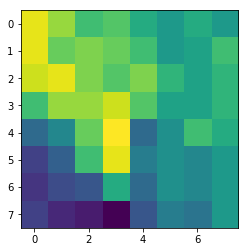

In [9]:
plt.imshow(data_array.reshape((8,8)));